In [1]:
import pickle
import numpy as np

load_loc = '/home/jehi/Dropbox/DTU/DeepFactData/annotated/'
with open(load_loc+"data_matrix_sample_programs.pickle",'rb') as f:
        data = pickle.load(f)

In [2]:
features = data['features']
features

['start time',
 'end time',
 'program_id',
 'sentence_id',
 'sentence',
 'claim_idx',
 'claim']

The sentences are for the data matrix (X), while the claims is for the outcome vector y

In [3]:
X = data['data'][:,4]
y = data['data'][:,6]
N = len(X)

# Some examples
for i in [21, 23, 33, 40, 48, 49, 50]: #range(100):
    print('Sentence is:\n\t' + X[i])
    print('Claim is:\n\t' + str(y[i])+'\n')
       
# Now convert y to a binary indicator matrix (1 is claim, 0 no claim)
y = np.asarray([y[i] is not None for i in range(N)])

Sentence is:
	Det har været ubehageligt.
Claim is:
	None

Sentence is:
	jeg er meget fortvivlet ...
Claim is:
	None

Sentence is:
	Statsministeren må overveje, om man kan have tillid til at den samme minister, som har været årsag til noget kritisabelt restriktivt, svingende ... alle de ord, som lige er nævnt om det er den rigtige person til også at rette op på alt det her sådan at vi kan få den vejledning, som vi kan forvente. Er ombudsmandens kritik alvorlig? Der er en kritik. Helt klart.
Claim is:
	None

Sentence is:
	Selvfølgelig. DF vil have en stram udlændingepolitik.
Claim is:
	DF vil have en stram udlændingepolitik

Sentence is:
	Det er der meget, der tyder på. Man skal være meget godtroende for ikke at tænke, at der ligger andet bag.
Claim is:
	None

Sentence is:
	Det er ikke en enkelt svipser. Det er helt konsekvent at man har vejledt forkert. Det viser ombudsmandens undersøgelse.
Claim is:
	Det er helt konsekvent at man har vejledt forkert. Det viser ombudsmandens undersøgels

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()


X_bow = vectorizer.fit_transform(X)
features = vectorizer.get_feature_names()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 5038 artists>

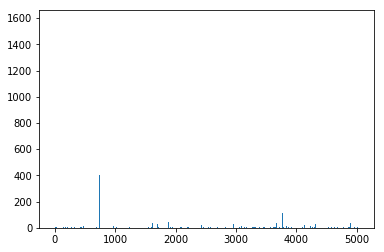

In [9]:
plt.figure()
plt.bar(range(len(features)),np.sum(X_bow,axis=0).T)

In [11]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

logistic.fit(X=X_bow,y=y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
logistic.score(X_bow,y)

0.97013752455795677

In [14]:
ypred = logistic.predict(X_bow)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, ypred)


array([[2346,    0],
       [  76,  123]])